In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
pwd = os.getcwd()
file_path = os.path.join(pwd, os.pardir, 'data/clean_data.csv')

In [3]:
data = pd.read_csv(file_path, parse_dates=["Start", "End"])

In [4]:
data_modified = data.copy()

In [5]:
user_agg = data_modified.groupby(["MSISDN/Number"], as_index=False).agg({'Bearer Id':'count', "Dur. (s)": "sum", "Total UL (Bytes)": "sum", "Total DL (Bytes)": "sum",  "Social Media UL (Bytes)": "sum", "Social Media DL (Bytes)": "sum", "Google UL (Bytes)": "sum", "Google DL (Bytes)": "sum", "Email UL (Bytes)": "sum", "Email DL (Bytes)": "sum", "Youtube UL (Bytes)": "sum", "Youtube DL (Bytes)": "sum", "Netflix UL (Bytes)": "sum", "Netflix DL (Bytes)": "sum", "Gaming UL (Bytes)": "sum", "Gaming DL (Bytes)": "sum", "Other UL (Bytes)": "sum", "Other DL (Bytes)": "sum"})

In [6]:
user_agg.reset_index(drop=True, inplace=True)

In [7]:
user_agg["MSISDN/Number"] = user_agg["MSISDN/Number"].astype(str)

In [8]:
user_agg.head()

,MSISDN/Number,Bearer Id,Dur. (s),Total UL (Bytes),Total DL (Bytes),Social Media UL (Bytes),Social Media DL (Bytes),Google UL (Bytes),Google DL (Bytes),Email UL (Bytes),Email DL (Bytes),Youtube UL (Bytes),Youtube DL (Bytes),Netflix UL (Bytes),Netflix DL (Bytes),Gaming UL (Bytes),Gaming DL (Bytes),Other UL (Bytes),Other DL (Bytes)
0,33601001722.0,1,116720.0,36053108.0,8.426375e+08,25631.0,2206504.0,1051882.0,3337123.0,493962.0,837400.0,6724347.0,14900201.0,16915876.0,10265105.0,1367528.0,8.110911e+08,9473882.0,377096990.0
1,33601001754.0,1,181230.0,36104459.0,1.207552e+08,62017.0,2598548.0,1137166.0,4197697.0,478960.0,2828821.0,7107972.0,5324251.0,10451194.0,770569.0,14714780.0,1.050353e+08,2152370.0,279557701.0
2,33601002511.0,1,134969.0,39306820.0,5.566597e+08,47619.0,3148004.0,99643.0,3343483.0,768880.0,2436500.0,19196298.0,2137272.0,2827981.0,16525919.0,9759228.0,5.290685e+08,6607171.0,495086501.0
3,33601007832.0,1,49878.0,20327526.0,4.019932e+08,28825.0,251469.0,3740728.0,5937765.0,106052.0,2178618.0,2584198.0,4393123.0,784730.0,1157362.0,3051292.0,3.880748e+08,10031701.0,25248001.0
4,33601008617.0,2,37104.0,94280527.0,1.363130e+09,51312.0,2861230.0,4770948.0,13728668.0,1057661.0,2247808.0,31193031.0,10339971.0,24230077.0,24971647.0,5816727.0,1.308981e+09,27160771.0,777643713.0


In [9]:
user_agg.rename(columns={"Bearer Id": "Session Count"}, inplace=True)

In [10]:
user_agg["Total Data Transferred"] = user_agg["Total UL (Bytes)"] + user_agg["Total DL (Bytes)"]

In [11]:
user_agg["Google Volume (Bytes)"] = user_agg["Google UL (Bytes)"] + user_agg["Google DL (Bytes)"]
user_agg["Netflix Volume (Bytes)"] = user_agg["Netflix UL (Bytes)"] + user_agg["Netflix DL (Bytes)"]
user_agg["Youtube Volume (Bytes)"] = user_agg["Youtube UL (Bytes)"] + user_agg["Youtube DL (Bytes)"]
user_agg["Gaming Volume (Bytes)"] = user_agg["Gaming UL (Bytes)"] + user_agg["Gaming DL (Bytes)"]
user_agg["Email Volume (Bytes)"] = user_agg["Email UL (Bytes)"] + user_agg["Email DL (Bytes)"]
user_agg["Social Media Volume (Bytes)"] = user_agg["Social Media UL (Bytes)"] + user_agg["Social Media DL (Bytes)"]
user_agg["Other Volume (Bytes)"] = user_agg["Other UL (Bytes)"] + user_agg["Other DL (Bytes)"]

In [12]:
user_agg["Total Volume (Bytes)"] = user_agg["Google Volume (Bytes)"] + user_agg["Netflix Volume (Bytes)"] + user_agg["Youtube Volume (Bytes)"] + user_agg["Gaming Volume (Bytes)"] + user_agg["Other Volume (Bytes)"] + user_agg["Social Media Volume (Bytes)"] + user_agg["Email Volume (Bytes)"]

In [13]:
volume_per_user = user_agg.drop(columns=[
    "Total UL (Bytes)",
    "Total DL (Bytes)",
    "Social Media UL (Bytes)",
    "Social Media DL (Bytes)",
    "Google UL (Bytes)",
    "Google DL (Bytes)",
    "Email UL (Bytes)",
    "Email DL (Bytes)",
    "Youtube UL (Bytes)",
    "Youtube DL (Bytes)",
    "Netflix UL (Bytes)",
    "Netflix DL (Bytes)",
    "Gaming UL (Bytes)",
    "Gaming DL (Bytes)",
    "Other UL (Bytes)",
    "Other DL (Bytes)"
])

In [14]:
# to convert the scientific notation to decimal format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [15]:
volume_per_user.head()

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes)
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00,1255787564.00
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00,436417344.00
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00,1091052984.00
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00,447568699.00
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00,2235054657.00


### Top 10 Customer Engagement
---

In [16]:
top_10_customers_per_engagement = volume_per_user.sort_values(by=["Session Count", "Dur. (s)", "Total Data Transferred"], ascending=[False, False, False])[:10]
top_10_customers_per_engagement

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes)
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00
64883,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,10455927858.00
658,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,11198899762.00
92239,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,11120874571.00
1270,33604515716.0,12,5207990.00,5487855293.00,83815037.00,265374262.00,179686748.00,4846663427.00,23854429.00,18476523.00,4129942723.00,9547813149.00


In [17]:
top_10_customers_per_engagement[["MSISDN/Number", "Session Count", "Dur. (s)", "Total Data Transferred"]]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred
13467,33626320676.0,18,8791927.00,7971167261.00
13123,33625779332.0,17,18553754.00,8499620722.00
6404,33614892860.0,17,9966898.00,8846226494.00
36909,33659725664.0,16,4035428.00,7705862783.00
92584,33760536639.0,15,9279434.00,8514773963.00
76077,33675877202.0,15,4865947.00,7891110608.00
64883,33667163239.0,13,8744914.00,5618394054.00
658,33603127838.0,12,6287761.00,4976195043.00
92239,33760413819.0,12,5321667.00,7132370514.00
1270,33604515716.0,12,5207990.00,5487855293.00


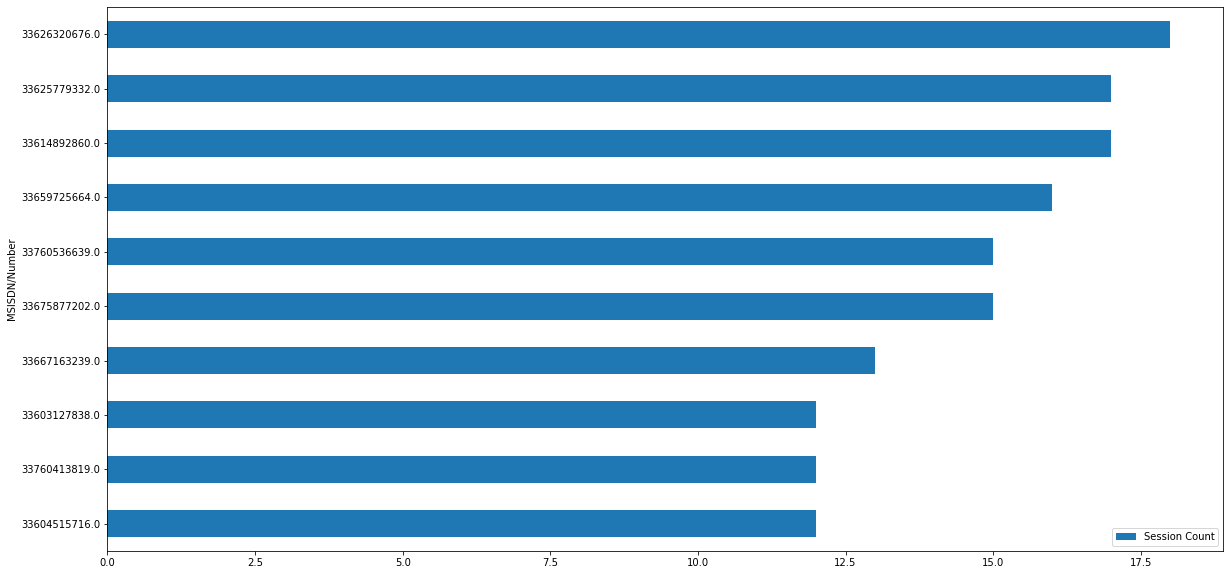

In [18]:
top_10_customers_per_engagement.plot(kind="barh", x="MSISDN/Number", y="Session Count", figsize=(20, 10)).invert_yaxis()

### K-means
---

In [19]:
scaler = MinMaxScaler()

In [20]:
df_norm = pd.DataFrame(scaler.fit_transform(volume_per_user.select_dtypes(include=np.number)), columns=volume_per_user.select_dtypes(include=np.number).columns)

In [21]:
df_norm.head()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes)
0,0.00,0.01,0.10,0.03,0.07,0.05,0.10,0.03,0.05,0.05,0.07
1,0.00,0.01,0.01,0.03,0.03,0.03,0.02,0.08,0.06,0.03,0.02
2,0.00,0.01,0.06,0.02,0.05,0.05,0.07,0.08,0.07,0.06,0.06
3,0.00,0.00,0.04,0.06,0.00,0.02,0.05,0.05,0.01,0.00,0.02
4,0.06,0.00,0.16,0.12,0.12,0.09,0.17,0.08,0.07,0.10,0.13


In [22]:
kmeans = KMeans(n_clusters=3)
y_predicted = kmeans.fit_predict(volume_per_user.select_dtypes(include=np.number))
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
volume_per_user["Cluster"] = kmeans.labels_

In [24]:
volume_per_user

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
0,33601001722.0,1,116720.00,878690574.00,4389005.00,27180981.00,21624548.00,812458661.00,1331362.00,2232135.00,386570872.00,1255787564.00,0
1,33601001754.0,1,181230.00,156859643.00,5334863.00,11221763.00,12432223.00,119750078.00,3307781.00,2660565.00,281710071.00,436417344.00,0
2,33601002511.0,1,134969.00,595966483.00,3443126.00,19353900.00,21333570.00,538827713.00,3205380.00,3195623.00,501693672.00,1091052984.00,0
3,33601007832.0,1,49878.00,422320698.00,9678493.00,1942092.00,6977321.00,391126127.00,2284670.00,280294.00,35279702.00,447568699.00,0
4,33601008617.0,2,37104.00,1457410944.00,18499616.00,49201724.00,41533002.00,1314797820.00,3305469.00,2912542.00,804804484.00,2235054657.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106466,33789996170.0,1,8810.00,714641641.00,7531269.00,14902538.00,26647843.00,660361359.00,1006915.00,300183.00,295282817.00,1006032924.00,0
106467,33789997247.0,1,140988.00,480307335.00,5429705.00,8531060.00,19851572.00,437003292.00,2514097.00,498569.00,211115113.00,684943408.00,0
106468,3197020876596.0,1,877385.00,232123971.00,10438660.00,26592300.00,11959905.00,178048738.00,1520771.00,715224.00,470526473.00,699802071.00,0
106469,337000037000919.0,1,253030.00,596287824.00,9830617.00,30905042.00,36734940.00,510142695.00,3318582.00,521566.00,149188439.00,740641881.00,0


In [25]:
plt.style.use('seaborn')

<AxesSubplot:xlabel='Google Volume (Bytes)', ylabel='Total Data Transferred'>

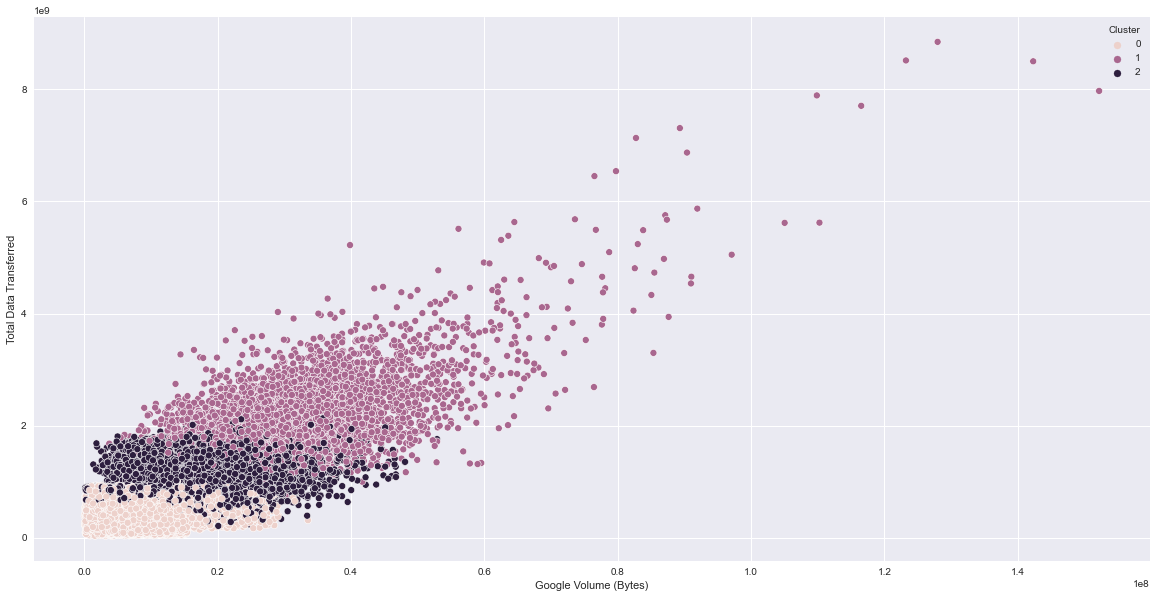

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x="Google Volume (Bytes)", y="Total Data Transferred",hue = 'Cluster',  data=volume_per_user, ax=ax)

In [27]:
volume_per_user.loc[volume_per_user["Cluster"] == 0].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
count,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00,73021.00
mean,1.06,108605.94,466315780.93,8235499.43,23836511.16,23874108.72,397333775.74,2386952.75,1930644.06,406636974.55,864234466.41,0.00
std,0.23,80605.87,230875956.60,4039667.21,10864944.96,10842025.99,229216441.79,1221146.52,1147588.62,239970025.36,297557668.95,0.00
min,1.00,7142.00,33249009.00,40330.00,184569.00,78903.00,306358.00,18176.00,1563.00,149045.00,58362293.00,0.00
25%,1.00,57320.00,271971169.00,5095148.00,16328626.00,16364464.00,203500648.00,1405069.00,975274.00,203413763.00,651766052.00,0.00
50%,1.00,86654.00,461452596.00,8098789.00,23189179.00,23292592.00,391216881.00,2355772.00,1898143.00,393135776.00,888905286.00,0.00
75%,1.00,143906.00,647730973.00,11041693.00,30370599.00,30461775.00,577647701.00,3269041.00,2829595.00,599367491.00,1097660263.00,0.00
max,4.00,2083209.00,1190604648.00,33543630.00,115801261.00,95710379.00,1028166969.00,10976151.00,8579792.00,1419798929.00,1581482873.00,0.00


In [28]:
volume_per_user.loc[volume_per_user["Cluster"] == 1].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
count,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00,4888.00
mean,3.97,520875.31,2153702874.03,31187888.00,90139163.51,90443990.64,1892778507.93,8998073.86,7252885.42,1833312188.62,3954112697.98,1.00
std,1.27,620328.44,660653978.36,12128939.24,33912396.57,34287150.32,600334658.38,3651159.39,3091823.02,634200243.16,1091359496.09,0.00
min,2.00,27448.00,760224740.00,3741559.00,10268566.00,10852144.00,477279075.00,947941.00,358980.00,294154547.00,2708756644.00,1.00
25%,3.00,280933.75,1725385688.50,22973719.50,67859750.50,67878648.50,1509940844.50,6527383.25,5163560.25,1419627917.00,3215056043.25,1.00
50%,4.00,371189.00,2020144379.00,29569651.50,85329299.50,85813787.50,1780555788.50,8579202.00,6940974.00,1747594848.00,3654861494.50,1.00
75%,5.00,510717.50,2439769938.00,37433789.25,107725323.50,108042255.00,2163020246.75,10872118.25,8944927.75,2140943453.00,4364746710.00,1.00
max,18.00,18553754.00,8846226494.00,152191852.00,399519079.00,452958769.00,7749432234.00,42418782.00,43374779.00,8167877776.00,16341524035.00,1.00


In [29]:
volume_per_user.loc[volume_per_user["Cluster"] == 2].describe()

,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
count,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00,28562.00
mean,1.82,179576.34,1017038933.76,14205356.28,41292541.07,41213363.95,897854273.05,4104150.21,3327817.88,879366214.88,1881363717.33,2.00
std,0.63,136169.14,296886222.05,6798297.20,18964755.59,18826105.53,278672890.67,2025380.52,1794807.03,320152798.49,422280575.98,0.00
min,1.00,7342.00,164389655.00,166246.00,492688.00,412485.00,49398555.00,32453.00,9804.00,21747166.00,1231526530.00,2.00
25%,1.00,86399.00,803033022.00,9304808.00,27074742.25,27136655.50,712278682.75,2642100.50,2015855.75,662428922.00,1520079993.00,2.00
50%,2.00,163933.00,930265185.50,13632987.00,39909685.50,39901855.50,831336426.00,3923765.00,3209059.00,817371726.00,1770730969.50,2.00
75%,2.00,239238.50,1218974525.00,18611818.00,53620274.25,53370727.50,1078164848.50,5410150.25,4513576.75,1089019065.00,2188812430.00,2.00
max,5.00,3174824.00,2209463703.00,52901672.00,146884380.00,146435811.00,1966686117.00,16825812.00,12522746.00,2319317787.00,3166967088.00,2.00


In [30]:
volume_per_user.sample(5)

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
94461,33761338967.0,1,60889.00,718499168.00,11019663.00,31050573.00,16062990.00,651539319.00,2661732.00,1390275.00,388821463.00,1102546015.00,0
98881,33763205545.0,2,27853.00,695465672.00,5897946.00,51227058.00,44647833.00,565503720.00,4308984.00,1926103.00,730213756.00,1403725400.00,2
3409,33610146969.0,1,95592.00,305531499.00,8127081.00,32986378.00,18617318.00,240888569.00,1802873.00,1701054.00,553896154.00,858019427.00,0
63941,33666847276.0,1,121787.00,681825490.00,13111252.00,29694613.00,23589716.00,599055042.00,2330580.00,3208312.00,185968784.00,856958299.00,0
47864,33662332299.0,2,186488.00,725632063.00,21456908.00,38392001.00,53130486.00,594665684.00,3681218.00,3539076.00,732495328.00,1447360701.00,2


In [33]:
volume_per_user.sort_values(by="Google Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00,1
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00,1
105756,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,9794825896.00,1
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00,1
64883,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,10455927858.00,1
94308,33761268199.0,10,3481629.00,5051114473.00,97089988.00,292091341.00,272789592.00,4274098999.00,20753721.00,14496080.00,5077779438.00,10049099159.00,1
85996,33698756430.0,10,2061185.00,5872262506.00,91935151.00,280812448.00,251422091.00,5118380458.00,28439707.00,15496248.00,4532623724.00,10319109827.00,1


In [34]:
volume_per_user.sort_values(by="Netflix Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00,1
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00,1
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
92239,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,11120874571.00,1
64883,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,10455927858.00,1
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00,1
105756,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,9794825896.00,1
94308,33761268199.0,10,3481629.00,5051114473.00,97089988.00,292091341.00,272789592.00,4274098999.00,20753721.00,14496080.00,5077779438.00,10049099159.00,1


In [35]:
volume_per_user.sort_values(by="Youtube Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00,1
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00,1
64883,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,10455927858.00,1
13934,33627080969.0,12,4703516.00,5754730859.00,87125921.00,267040897.00,308790774.00,4972352941.00,23567219.00,17808911.00,5117790890.00,10794477553.00,1
92239,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,11120874571.00,1
86138,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00,11139052121.00,1
658,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,11198899762.00,1


In [38]:
volume_per_user.sort_values(by="Gaming Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00,1
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00,1
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00,1
62804,33666464084.0,11,4536757.00,7308500938.00,89320737.00,214416926.00,227336012.00,6646303338.00,25557139.00,18629986.00,4349141478.00,11570705616.00,1
92239,33760413819.0,12,5321667.00,7132370514.00,82738720.00,318347546.00,303169107.00,6268619592.00,25576965.00,20777205.00,4101645436.00,11120874571.00,1
57032,33664712899.0,11,2927785.00,6872018208.00,90389372.00,251798809.00,276834013.00,6103856008.00,21426007.00,19390599.00,3976960308.00,10740655116.00,1
86138,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00,11139052121.00,1


In [39]:
volume_per_user.sort_values(by="Email Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
105756,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,9794825896.00,1
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00,1
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00,1
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00,1
59872,33665460546.0,9,2566292.00,5388630694.00,63597426.00,197517914.00,232292532.00,4781002506.00,30417885.00,10554843.00,2973452159.00,8288835265.00,1
64883,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,10455927858.00,1
86138,33698792269.0,11,5169128.00,6540899126.00,79736125.00,268247480.00,302661958.00,5753743069.00,29059042.00,15728161.00,4689876286.00,11139052121.00,1


In [40]:
volume_per_user.sort_values(by="Social Media Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
92584,33760536639.0,15,9279434.00,8514773963.00,123223099.00,334643269.00,396289198.00,7461045228.00,33693767.00,39783189.00,4716134493.00,13104812243.00,1
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00,1
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
64883,33667163239.0,13,8744914.00,5618394054.00,105032696.00,313939488.00,315231310.00,4725621924.00,30335796.00,24247850.00,4941518794.00,10455927858.00,1
105756,33786323068.0,12,4059652.00,5622231529.00,110254484.00,305939790.00,214763912.00,4851095633.00,36310123.00,23974919.00,4252487035.00,9794825896.00,1
70705,33669068942.0,11,610801.00,3906542286.00,77824684.00,212009030.00,236402804.00,3269151651.00,22923413.00,23800834.00,4605369289.00,8447481705.00,1
658,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,11198899762.00,1
31201,33658490784.0,9,3061779.00,2690138875.00,76434143.00,186793931.00,183264219.00,2125069243.00,19677691.00,23000066.00,4315511033.00,6929750326.00,1


In [41]:
volume_per_user.sort_values(by="Other Volume (Bytes)", ascending=False)[:10]

,MSISDN/Number,Session Count,Dur. (s),Total Data Transferred,Google Volume (Bytes),Netflix Volume (Bytes),Youtube Volume (Bytes),Gaming Volume (Bytes),Email Volume (Bytes),Social Media Volume (Bytes),Other Volume (Bytes),Total Volume (Bytes),Cluster
13467,33626320676.0,18,8791927.00,7971167261.00,152191852.00,328725740.00,374483047.00,6887572116.00,42418782.00,43374779.00,8167877776.00,15996644092.00,1
6404,33614892860.0,17,9966898.00,8846226494.00,127973787.00,361401046.00,394370218.00,7749432234.00,40788634.00,28294544.00,7639263572.00,16341524035.00,1
76077,33675877202.0,15,4865947.00,7891110608.00,109860502.00,309093159.00,317410572.00,6970567597.00,31514421.00,19222921.00,6798515150.00,14556184322.00,1
13123,33625779332.0,17,18553754.00,8499620722.00,142307915.00,356980607.00,452958769.00,7326673487.00,40633966.00,27135500.00,6354583086.00,14701273330.00,1
658,33603127838.0,12,6287761.00,4976195043.00,86929016.00,260488421.00,284090139.00,4191444592.00,26198895.00,23077825.00,6326670874.00,11198899762.00,1
36909,33659725664.0,16,4035428.00,7705862783.00,116516345.00,399519079.00,257991088.00,6725559211.00,35999792.00,35412358.00,6317415487.00,13888413360.00,1
13877,33626948251.0,10,2415036.00,4825638441.00,69987947.00,262722069.00,200085240.00,4181762590.00,17482788.00,16922002.00,5305447882.00,10054410518.00,1
13934,33627080969.0,12,4703516.00,5754730859.00,87125921.00,267040897.00,308790774.00,4972352941.00,23567219.00,17808911.00,5117790890.00,10794477553.00,1
94308,33761268199.0,10,3481629.00,5051114473.00,97089988.00,292091341.00,272789592.00,4274098999.00,20753721.00,14496080.00,5077779438.00,10049099159.00,1
30591,33658361927.0,10,2131710.00,6452397856.00,76507138.00,264142078.00,260989846.00,5705919641.00,19682048.00,17285759.00,5013650844.00,11358177354.00,1


In [53]:
top_3_applications = volume_per_user[["Google Volume (Bytes)", "Netflix Volume (Bytes)", "Email Volume (Bytes)", "Youtube Volume (Bytes)", "Gaming Volume (Bytes)", "Social Media Volume (Bytes)", "Other Volume (Bytes)"]].sum().nlargest(3)

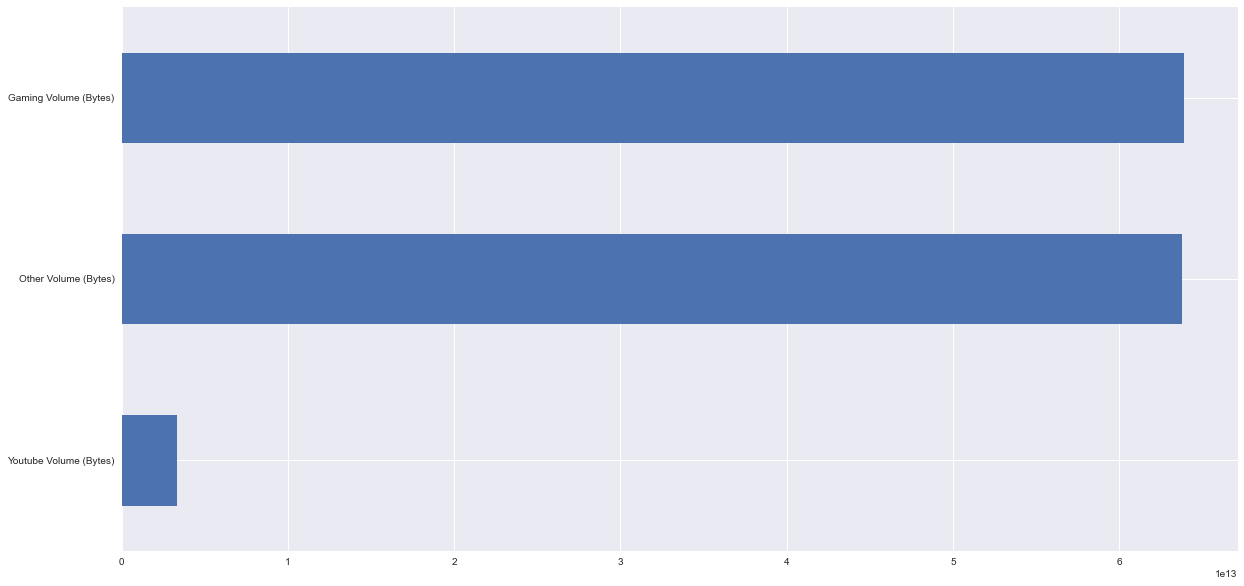

In [54]:
top_3_applications.plot(kind="barh", figsize=(20, 10)).invert_yaxis()